In [ ]:
# Copyright 2023, Acadential, All rights reserved.

# 9-4. Validation Loop

이번 시간에는 Validation Loop을 구현해보겠습니다. \
Validation Loop이란 모델의 성능 평가를 위한 반복문을 의미합니다.

In [8]:
import torch 
from tqdm import tqdm 
from torch import nn 
# matplotlib for plotting
import matplotlib.pyplot as plt

# Importing the model 
from src.model import NeuralNetwork

# Importing the dataloaders
from src.data import get_dataloaders


## Define and initialize the model

In [9]:
model = NeuralNetwork()

## Load dataset and create dataloader

In [10]:
train_dataloader, test_dataloader = get_dataloaders()

## Define loss function

In [11]:
loss_fn = nn.CrossEntropyLoss()

## Define optimizer


In [12]:
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001)

In [14]:
train_loss_history = []
test_loss_history = []
test_acc_history = []
epochs = 10

for epoch in range(epochs):
    # Train Loop
    tbar = tqdm(train_dataloader)
    model.train()  # train mode
    for (batch, label) in tbar:
        pred = model(batch)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        tbar.set_description(f"Epoch {epoch} Train Loss: {loss.item():.4f}")
        train_loss_history.append(loss.item())
    
    # Validation Loop
    model.eval()  # evaluation mode
    tbar = tqdm(test_dataloader)
    test_loss, correct = 0, 0
    num_batches = len(test_dataloader)
    size = len(test_dataloader.dataset)
    
    with torch.no_grad():  # gradient 계산 비활성화 (Gradient Descent을 수행하지 않기 때문에)
        for (batch, label) in tbar:
            pred = model(batch)
            loss = loss_fn(pred, label)  # loss 계산
            test_loss += loss  # loss 누적
            correct += (pred.argmax(1) == label).type(torch.float).sum().item()  # 맞춘 개수 계산 후 누적
            # Mini-batch을 구성하는 데이터 샘플들 중 몇 개를 맞추었는지를 계산
            
            tbar.set_description(f"Epoch {epoch} Test Loss: {loss.item():.4f}")
    test_loss /= num_batches  # loss 평균  (Mini-batch 평균들의 합을 Mini-batch 개수로 나눔)
    correct /= size  # 정확도 계산  (맞춘 총 개수를 전체 데이터 개수로 나눔)
    
    test_loss_history.append(test_loss)
    test_acc_history.append(correct)
    
            
            
            

Test Loss: 2.2620: 100%|██████████| 157/157 [00:01<00:00, 114.91it/s]


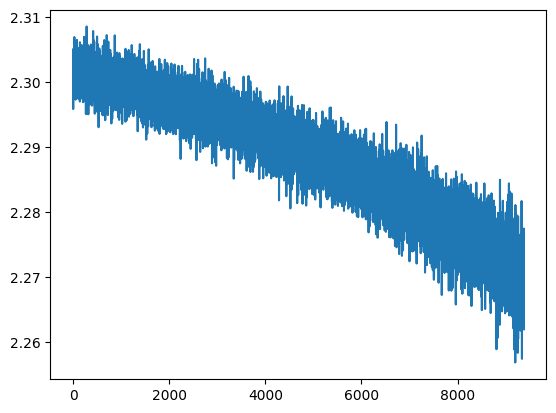

In [15]:
plt.figure()
plt.plot(train_loss_history)
plt.title('Train loss history')

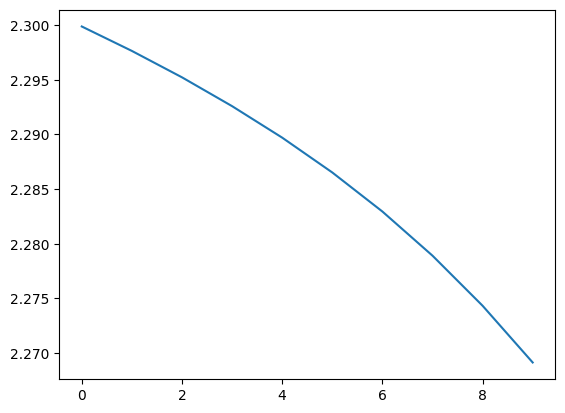

In [16]:
plt.figure()
plt.plot(test_loss_history)
plt.title('Test loss history')

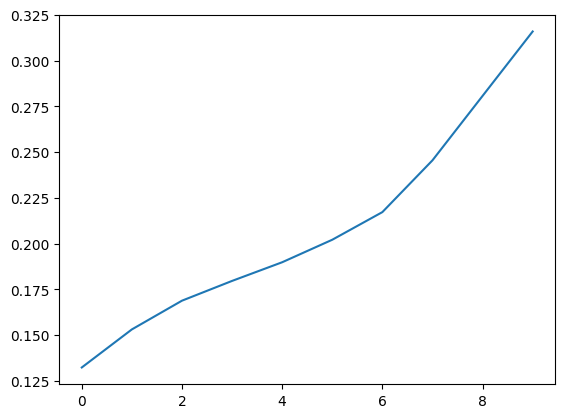

In [17]:
plt.figure()
plt.plot(test_acc_history)
plt.title('Test accuracy history')